### Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    
    * quantity and unitprice both columns need some cleaning 
    * data set has negative values for the quantity column 
    * data set has `0's` in unit_price column
    * Added a new column `amount_spent` by multiplying `quantity` and `unitprice` columns
    
* [Exploratory Data Analysis](#EDA)
    * orders frequency per month 
    * orders frequency per day 
    * orders frequency per hour 
    * Analyze variables within the data to gain patterns and insights
* [Conclusion](#conclusion)    

### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some e-commerce data. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

https://www.kaggle.com/carrie1/ecommerce-data

Information regarding the features for the data are located in the `Column` section on the website.

#### Loading the Data

In [110]:
pip install plotly==5.5.0

Note: you may need to restart the kernel to use updated packages.


In [111]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import squarify 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [112]:
df= pd.read_csv("/Users/vishalsanjeevuni/Documents/datasets/E-commerce/data.csv", encoding = 'unicode_escape')

#### Attribute Information:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.



In [113]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [114]:
df.shape

(541909, 8)

In [115]:
df.columns = map(str.lower, df.columns)

In [116]:
df = df.rename({'invoiceno': 'invoice_no', 'invoicedate': 'invoice_date', 'unitprice': 'unit_price', 'customerid': 'customer_id'}, axis=1)

In [117]:
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

In [118]:
df['description'] = df.description.str.lower()

In [119]:
df.head()

,invoice_no,stockcode,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [120]:
df.dtypes

invoice_no              object
stockcode               object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id            float64
country                 object
dtype: object

In [121]:
df = df.drop_duplicates() 

In [122]:
df.nunique() 

invoice_no      25900
stockcode        4070
description      4206
quantity          722
invoice_date    23260
unit_price       1630
customer_id      4372
country            38
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    536641 non-null  object        
 1   stockcode     536641 non-null  object        
 2   description   535187 non-null  object        
 3   quantity      536641 non-null  int64         
 4   invoice_date  536641 non-null  datetime64[ns]
 5   unit_price    536641 non-null  float64       
 6   customer_id   401604 non-null  float64       
 7   country       536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [124]:
df.shape

(536641, 8)

- How much does a typical item cost?
- What are the product categories and what is the proportion of items to categories?
- what is the range of invoice times?

In [125]:
print(df.describe())

            quantity     unit_price    customer_id
count  536641.000000  536641.000000  401604.000000
mean        9.620029       4.632656   15281.160818
std       219.130156      97.233118    1714.006089
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13939.000000
50%         3.000000       2.080000   15145.000000
75%        10.000000       4.130000   16784.000000
max     80995.000000   38970.000000   18287.000000


### Data Cleaning

* quantity and unitprice both columns need some cleaning 
* data set has negative values for the quantity column 
* data set has `0's` in unit_price column 

In [126]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

customer_id     135037
description       1454
invoice_no           0
stockcode            0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [127]:
df.dropna(axis = 0, subset = ['customer_id'], inplace = True)

In [128]:
df.isnull().sum().sort_values(ascending=False)

invoice_no      0
stockcode       0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [129]:
df = df[df.quantity > 0]

In [130]:
df.describe().round(2)

,quantity,unit_price,customer_id
count,392732.00,392732.00,392732.00
mean,13.15,3.13,15287.73
std,181.59,22.24,1713.57
min,1.00,0.00,12346.00
25%,2.00,1.25,13955.00
50%,6.00,1.95,15150.00
75%,12.00,3.75,16791.00
max,80995.00,8142.75,18287.00


#### Adding `amount_spent` Column 

The DataFrame contains `quantity` and `unitprice` columns; however, a column with the `total_sale` of each customer will be easier for analysis. Because of this, the following is done

In [131]:
df['amount_spent'] = df['quantity'] * df['unit_price']

In [132]:
df['month']= df.invoice_date.dt.month

# +1 to make Monday=1.....until Sunday=7

df['day']= df.invoice_date.dt.dayofweek+1
df['hour']= df.invoice_date.dt.hour
df.head()

,invoice_no,stockcode,description,quantity,invoice_date,unit_price,customer_id,country,amount_spent,month,day,hour
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,3,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,3,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,3,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,3,8
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,3,8


* Found and removed outliers in `quantity` and `unitprice` columns

### Exploratory Data Analysis
* Data set contains transactions occurred between 01/12/2010 and 09/12/2011 
* creating a pivot table to see stocks distribution

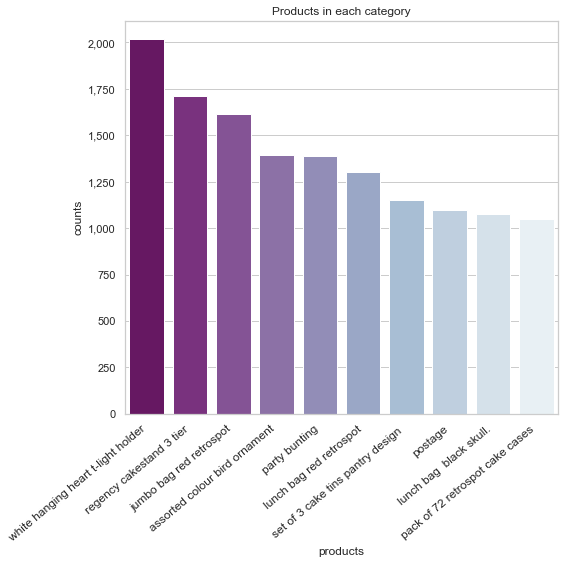

In [133]:
#number of product categories :  4206
#number of products in each category 


product_counts = df.description.value_counts().head(10)

df_val_counts = pd.DataFrame(product_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['products', 'counts']

df_value_counts_reset



plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.barplot(data= df_value_counts_reset, x= "products", y= "counts",palette ="BuPu_r")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.title("Products in each category")
plt.tight_layout()
plt.show()

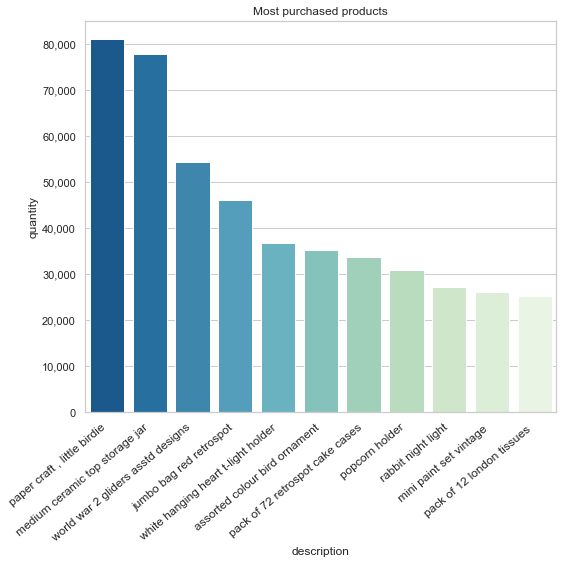

In [134]:
#creating proportions 
products_df = df.groupby("description").agg({"quantity": "sum"}).sort_values(by = "quantity", ascending = False).head(11)
products_df.reset_index(inplace=True)
products_df
plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.barplot(data= products_df, x="description", y= "quantity", palette="GnBu_r")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.title("Most purchased products")
plt.tight_layout()
plt.show()

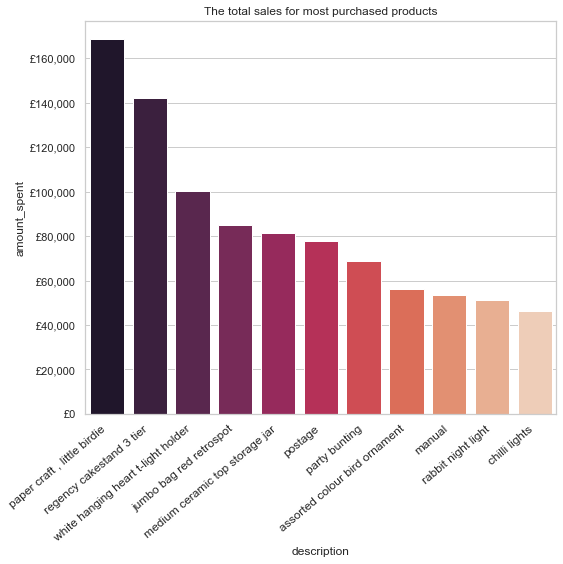

In [135]:
stock_df = df.groupby("description").agg({"amount_spent": "sum"}). sort_values(by = "amount_spent", ascending = False).head(11)
stock_df.reset_index(inplace=True)
plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.barplot(data= stock_df, x="description", y= "amount_spent", palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.title("The total sales for most purchased products")
plt.tight_layout()
plt.show()

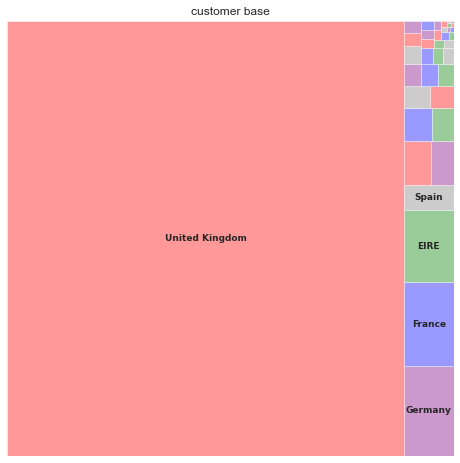

In [163]:
#customers from each country
country_counts= df['country'].value_counts(normalize = True)

df_val_counts = pd.DataFrame(country_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['country', 'num_customers']



sizes= df_value_counts_reset['num_customers']
label= df_value_counts_reset['country'][:5]
color=['red','purple', 'blue','green','grey']

fig, ax = plt.subplots(1, figsize = (8, 8))
squarify.plot(sizes=sizes, label=label, color=color,text_kwargs={'fontsize':9, 'fontname':"DejaVu Sans",'weight':'bold'}, alpha=0.4)
plt.axis('off')
plt.title("customer base")
plt.show()

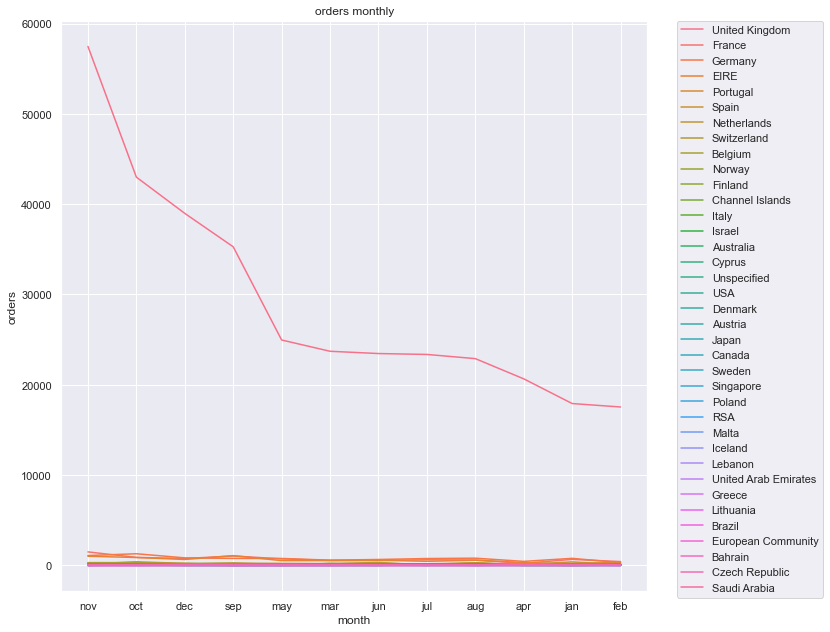

In [137]:
#orders per month 

invoice_counts= df['invoice_no']

unpivoted_months = df.groupby(['country', 'month'])['invoice_no'].count().reset_index()

pivoted_months = unpivoted_months.pivot(
    columns='month',
    index='country',
    values='invoice_no')

pivoted_months = pd.DataFrame(pivoted_months)
pivoted_months = pivoted_months.reset_index()
pivoted_months.index = np.arange(1, len(pivoted_months) + 1)
pivoted_months.columns = ['country','jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
pivoted_months= pivoted_months.fillna(0)

pivoted_months[("jan")] = pivoted_months[("jan")].astype(int)
pivoted_months[("feb")] = pivoted_months[("feb")].astype(int)
pivoted_months[("mar")] = pivoted_months[("mar")].astype(int)
pivoted_months[("apr")] = pivoted_months[("apr")].astype(int)
pivoted_months[("may")] = pivoted_months[("may")].astype(int)
pivoted_months[("jun")] = pivoted_months[("jun")].astype(int)
pivoted_months[("jul")] = pivoted_months[("jul")].astype(int)
pivoted_months[("aug")] = pivoted_months[("aug")].astype(int)
pivoted_months[("sep")] = pivoted_months[("sep")].astype(int)
pivoted_months[("oct")] = pivoted_months[("oct")].astype(int)
pivoted_months[("nov")] = pivoted_months[("nov")].astype(int)
pivoted_months[("dec")] = pivoted_months[("dec")].astype(int)

pivoted_months

#tidy data 

formatted_pivoted_months= pd.melt(pivoted_months, id_vars="country", var_name="month", value_name="orders")
formatted_pivoted_months= formatted_pivoted_months.sort_values(by=["orders"], ascending = False)

formatted_pivoted_months.head(20)

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10.5,10.5))
ax= plt.subplot()
sns.lineplot(x="month", y="orders", hue= 'country', data=formatted_pivoted_months)
#moves legend to right side of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("orders monthly")
plt.show()

In [138]:
pivoted_months.describe()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,567.324324,532.621622,726.270270,606.351351,758.783784,727.729730,718.432432,724.216216,1072.189189,1318.810811,1707.621622,1154.027027
std,2937.317011,2875.270880,3886.681194,3389.099268,4093.222774,3844.248291,3829.315652,3750.640235,5786.222500,7047.505717,9427.502928,6394.897703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,15.000000,18.000000,22.000000,12.000000,18.000000,29.000000,23.000000,4.000000,47.000000,43.000000,31.000000
75%,108.000000,89.000000,114.000000,46.000000,80.000000,125.000000,89.000000,139.000000,102.000000,160.000000,176.000000,82.000000
max,17921.000000,17539.000000,23711.000000,20657.000000,24959.000000,23458.000000,23360.000000,22895.000000,35281.000000,42995.000000,57469.000000,38982.000000


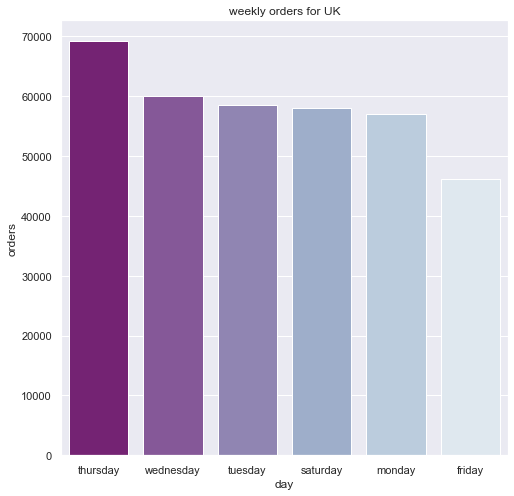

In [139]:
# orders per day

invoice_counts= df['invoice_no']

unpivoted_days = df.groupby(['country', 'day'])['invoice_no'].count().reset_index()

pivoted = unpivoted_days.pivot(
    columns='day',
    index='country',
    values='invoice_no')


pivoted = pd.DataFrame(pivoted)
pivoted = pivoted.reset_index()
pivoted.index = np.arange(1, len(pivoted) + 1)
pivoted.columns = ['country','monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']

pivoted= pivoted.fillna(0)

pivoted[("monday")] = pivoted[("monday")].astype(int)
pivoted[("tuesday")] = pivoted[("tuesday")].astype(int)
pivoted[("wednesday")] = pivoted[("wednesday")].astype(int)
pivoted[("thursday")] = pivoted[("thursday")].astype(int)
pivoted[("friday")] = pivoted[("friday")].astype(int)
pivoted[("saturday")] = pivoted[("saturday")].astype(int)

pivoted_days= pivoted
pivoted_days


#tidy data 

formatted_pivoted_days= pd.melt(pivoted_days, id_vars="country", var_name="day", value_name="orders")
formatted_pivoted_days= formatted_pivoted_days.sort_values(by=["orders"], ascending = False)

formatted_pivoted_days

#plotting with outliers

f, ax = plt.subplots(figsize=(8, 8))
formatted_pivoted_days_sub= formatted_pivoted_days[formatted_pivoted_days["orders"] >= 45000]
sns.barplot(x="day", y="orders", data=formatted_pivoted_days_sub, palette="BuPu_r")
plt.title("weekly orders for UK")
plt.show()

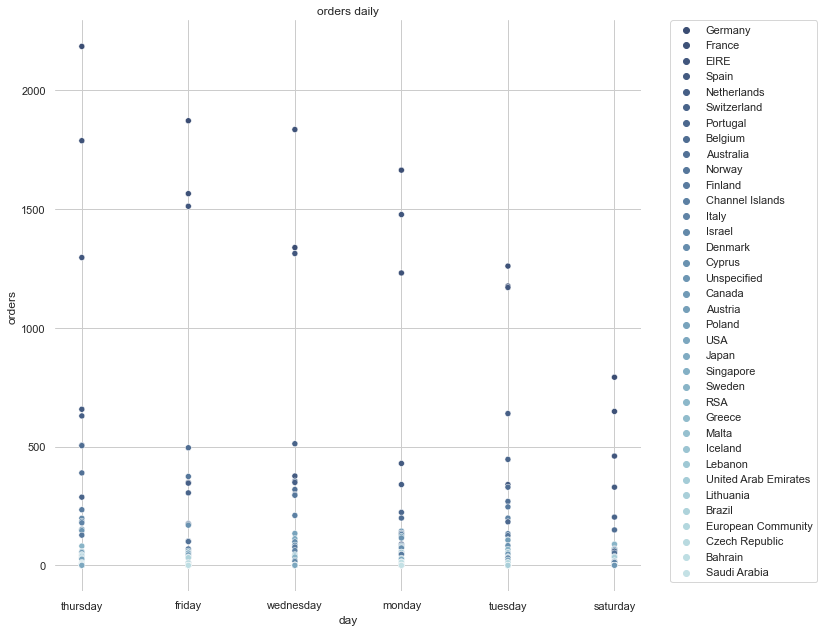

In [140]:
formatted_pivoted_days_sub2= formatted_pivoted_days[formatted_pivoted_days["orders"] <= 45000]


sns.set_theme(style="whitegrid")



# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(10.5, 10.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["thursday", "friday", "wednesday", "monday", "tuesday", "saturday"]
sns.scatterplot(x="day", y="orders", hue="country", palette="ch:r=-.2,d=.3_r", data=formatted_pivoted_days_sub2)
#moves legend to right side of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("orders daily")
plt.show()

In [141]:
pivoted.describe()

,monday,tuesday,wednesday,thursday,friday,saturday
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,1736.135135,1776.945946,1839.000000,2142.162162,1465.702703,1654.432432
std,9353.407241,9601.559494,9855.002985,11343.301458,7570.617756,9538.589695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,12.000000,0.000000,0.000000
50%,73.000000,55.000000,45.000000,81.000000,52.000000,12.000000
75%,136.000000,246.000000,298.000000,287.000000,176.000000,68.000000
max,57044.000000,58568.000000,60113.000000,69213.000000,46192.000000,58097.000000


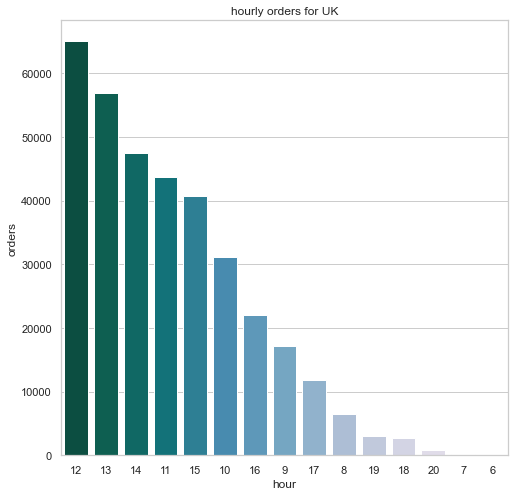

In [142]:
#orders per hour

invoice_counts= df['invoice_no']

unpivoted_hours = df.groupby(['country', 'hour'])['invoice_no'].count().reset_index()

pivoted_hours = unpivoted_hours.pivot(
    columns='hour',
    index='country',
    values='invoice_no')



pivoted_hours = pd.DataFrame(pivoted_hours)
pivoted_hours.columns = ['6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
pivoted_hours = pivoted_hours.reset_index()
pivoted_hours.index = np.arange(1, len(pivoted_hours) + 1)

pivoted_hours= pivoted_hours.fillna(0)

pivoted_hours[("6")] = pivoted_hours[("6")].astype(int)
pivoted_hours[("7")] = pivoted_hours[("7")].astype(int)
pivoted_hours[("8")] = pivoted_hours[("8")].astype(int)
pivoted_hours[("9")] = pivoted_hours[("9")].astype(int)
pivoted_hours[("10")] = pivoted_hours[("10")].astype(int)
pivoted_hours[("11")] = pivoted_hours[("11")].astype(int)
pivoted_hours[("12")] = pivoted_hours[("12")].astype(int)
pivoted_hours[("13")] = pivoted_hours[("13")].astype(int)
pivoted_hours[("14")] = pivoted_hours[("14")].astype(int)
pivoted_hours[("15")] = pivoted_hours[("15")].astype(int)
pivoted_hours[("16")] = pivoted_hours[("16")].astype(int)
pivoted_hours[("17")] = pivoted_hours[("17")].astype(int)
pivoted_hours[("18")] = pivoted_hours[("18")].astype(int)
pivoted_hours[("19")] = pivoted_hours[("19")].astype(int)
pivoted_hours[("20")] = pivoted_hours[("20")].astype(int)


pivoted_hours


#tidy data 

formatted_pivoted_hours= pd.melt(pivoted_hours, id_vars="country", var_name="hour", value_name="orders")
formatted_pivoted_hours= formatted_pivoted_hours.sort_values(by=["orders"], ascending = False)

#plotting with outliers
f, ax = plt.subplots(figsize=(8, 8))
formatted_pivoted_hours_sub= formatted_pivoted_hours[formatted_pivoted_hours["country"] == 'United Kingdom']
sns.barplot(x= 'hour', y= 'orders', data=formatted_pivoted_hours_sub, palette="PuBuGn_r")
plt.title("hourly orders for UK")
plt.show()

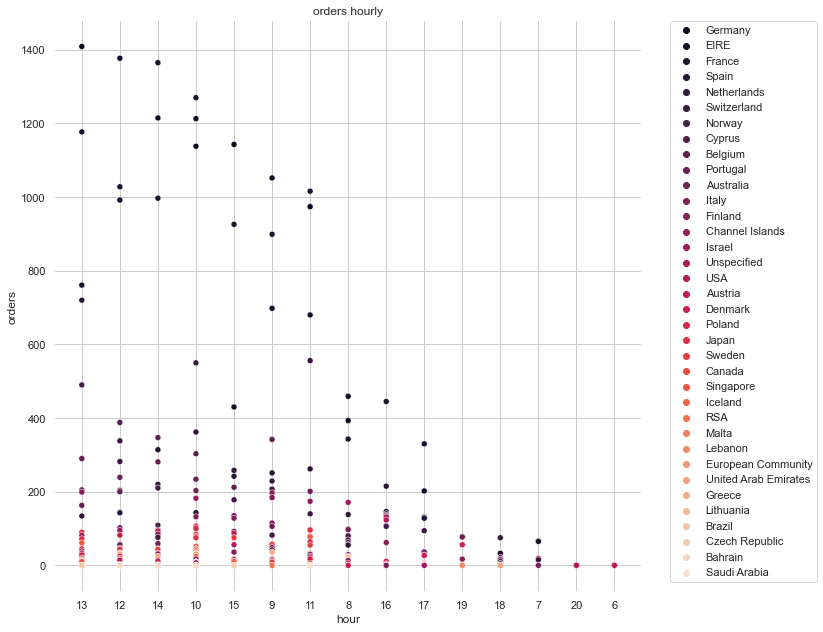

In [143]:
#plotting with outliers
f, ax = plt.subplots(figsize=(10.5, 10.5))
sns.despine(f, left=True, bottom=True)
formatted_pivoted_hours_sub= formatted_pivoted_hours[formatted_pivoted_hours["country"] != 'United Kingdom']
sns.scatterplot(x= 'hour', y= 'orders', hue="country", data=formatted_pivoted_hours_sub, palette="rocket")
#moves legend to right side of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("orders hourly")
plt.show()

In [144]:
#zeros in amount spent column indicate free orders 

df.head()

,invoice_no,stockcode,description,quantity,invoice_date,unit_price,customer_id,country,amount_spent,month,day,hour
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,3,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,3,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,3,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,3,8
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,3,8


In [145]:
free= df[df["amount_spent"] == 0]

In [146]:
print(len(free))

40


In [147]:
free

,invoice_no,stockcode,description,quantity,invoice_date,unit_price,customer_id,country,amount_spent,month,day,hour
9302,537197,22841,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0,12,7,14
33576,539263,22580,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0,12,4,14
40089,539722,22423,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0,12,2,13
47068,540372,22090,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0,1,4,16
47070,540372,22553,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0,1,4,16
56674,541109,22168,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0.0,1,4,15
86789,543599,84535B,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0.0,2,4,13
130188,547417,22062,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0.0,3,3,10
139453,548318,22055,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0.0,3,3,12
145208,548871,22162,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0.0,4,1,14


In [148]:
#free orders per country 

per_country= free.groupby(['country', 'month']).quantity.count().reset_index()

per_country.index = np.arange(1, len(per_country) + 1)
per_country.columns = ['country','month', 'frequency']

per_country

,country,month,frequency
1,Australia,5,1
2,Australia,11,2
3,EIRE,8,1
4,EIRE,12,1
5,France,11,1
6,Germany,11,1
7,Germany,12,1
8,Netherlands,8,4
9,Norway,11,1
10,RSA,10,1


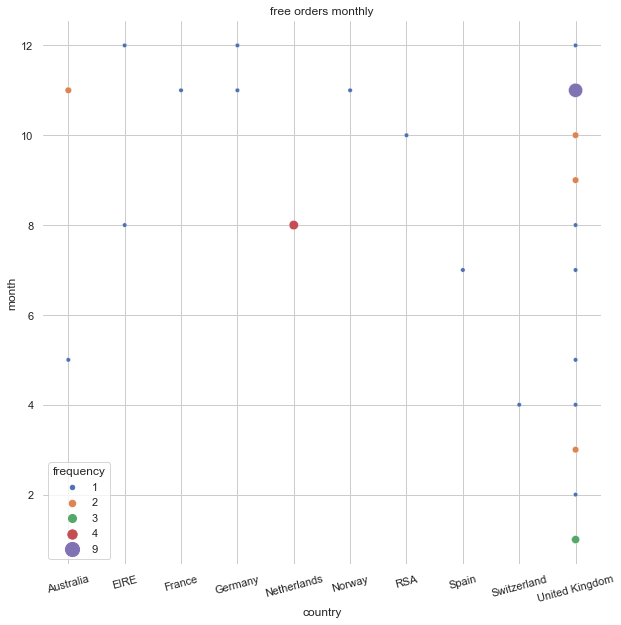

In [149]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(y= 'month', x= 'country', hue="frequency", data=per_country, palette="deep", size="frequency",sizes=(20, 200), legend="full")
plt.xticks(rotation=15)
plt.title("free orders monthly")
plt.show()

## Conclusions
* Most customers are from the UK, Germany, France, Ireland, Spain
* Customers from the UK usually shop on Thursday, Wednesday and Tuesday. In other countries, customers usually shop on Thursday, Friday and Wednesday
* Customers in the UK usually start shopping around 12 o clock afternoon to around 7 pm. Customers in other countries usually start shopping from 1 pm to around 7 pm
* Customers in the UK have been receiving free items every month. Most of the free items were sent in the months of * November and December